# Imports


In [254]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [255]:
import numpy as np
from scripts.gaussian_streaming_clusterer import CluStream
from scripts.gaussian_dynamic_clusterer_multidimension import DynamicClusterer
from scripts.utils import get_colors

from river import drift

In [256]:
colors = get_colors()


def import_and_shuffle_csv(file_path, seed=42):
    final_2d_data = np.loadtxt(file_path, delimiter=",")

    if seed is not None:
        np.random.seed(seed)

    reference_data = final_2d_data[:1000]
    np.random.shuffle(reference_data)

    batch1 = final_2d_data[1000:1200]
    np.random.shuffle(batch1)

    batch2 = final_2d_data[1200:1400]
    np.random.shuffle(batch2)

    batch3 = final_2d_data[1400:1600]
    np.random.shuffle(batch3)

    batch4 = final_2d_data[1600:1800]
    np.random.shuffle(batch4)

    batch5 = final_2d_data[1800:2000]
    np.random.shuffle(batch5)

    return reference_data, [batch1, batch2, batch3, batch4, batch5]

number of colors defined: 20


In [266]:
# file_path, drift_type = "./data/brightness_data/final_4d_brightness.csv", "BRIGHTNESS-4D"
# file_path, drift_type = "./data/brightness_data/final_8d_brightness.csv", "BRIGHTNESS-8D"
# file_path, drift_type = "./data/brightness_data/final_16d_brightness.csv", "BRIGHTNESS-16D"
# file_path, drift_type = "./data/brightness_data/final_32d_brightness.csv", "BRIGHTNESS-32D"
# file_path, drift_type = "./data/brightness_data/final_64d_brightness.csv", "BRIGHTNESS-64D"
# file_path, drift_type = "./data/brightness_data/final_128d_brightness.csv", "BRIGHTNESS-128D"
# file_path, drift_type = "./data/brightness_data/final_256d_brightness.csv", "BRIGHTNESS-256D"
# file_path, drift_type = "./data/brightness_data/final_512d_brightness.csv", "BRIGHTNESS-512D"
# file_path, drift_type = "./data/brightness_data/full_brightness_embeddings.csv", "BRIGHTNESS-FULL-EMBEDDINGS"

# file_path, drift_type = "./data/contrast_data/final_4d_contrast.csv", "CONTRAST-4D"
file_path, drift_type = "./data/contrast_data/final_8d_contrast.csv", "CONTRAST-8D"
# file_path, drift_type = "./data/contrast_data/final_16d_contrast.csv", "CONTRAST-16D"
# file_path, drift_type = "./data/contrast_data/final_32d_contrast.csv", "CONTRAST-32D"
# file_path, drift_type = "./data/contrast_data/final_64d_contrast.csv", "CONTRAST-64D"
# file_path, drift_type = "./data/contrast_data/final_128d_contrast.csv", "CONTRAST-128D"
# file_path, drift_type = "./data/contrast_data/final_256d_contrast.csv", "CONTRAST-256D"
# file_path, drift_type = "./data/contrast_data/final_512d_contrast.csv", "CONTRAST-512D"
# file_path, drift_type = "./data/contrast_data/full_contrast_embeddings.csv", "CONTRAST-FULL-EMBEDDINGS"

reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [267]:
def init_dynamic_clusterer(data=reference_data, threshold=5):
    clustream_model = CluStream(
        max_micro_clusters=200,
        time_window=100,
        seed=0,
    )
    drift_detector = drift.PageHinkley(delta=0.0005, threshold=threshold)

    dynamic_clusterer = DynamicClusterer(
        data, clustream_model, drift_detector, colors, ax_limit=10
    )

    return dynamic_clusterer

New model created - id: 19479
(id: 0)
(id: 1)
<!> Change detected! Possible input drift at timestamp 12 ----> Apply macroclustering <!>

ref0 - center: [np.float64(6.266158931531734), np.float64(7.317168576213782), np.float64(11.202311192320622), np.float64(11.266345221823894), np.float64(6.568079952413952), np.float64(6.771527231404854), np.float64(4.638424412259582), np.float64(1.9245700168039095)]
prod0 - center: [np.float64(6.212776522223516), np.float64(7.278229835369896), np.float64(11.207263330402423), np.float64(11.282105211125996), np.float64(6.58460474412461), np.float64(6.792773914075506), np.float64(4.608197354478863), np.float64(1.9344250123257019)]
hellinger distance: 0.0

ref0 - center: [np.float64(6.266158931531734), np.float64(7.317168576213782), np.float64(11.202311192320622), np.float64(11.266345221823894), np.float64(6.568079952413952), np.float64(6.771527231404854), np.float64(4.638424412259582), np.float64(1.9245700168039095)]
prod1 - center: [np.float64(5.7161845

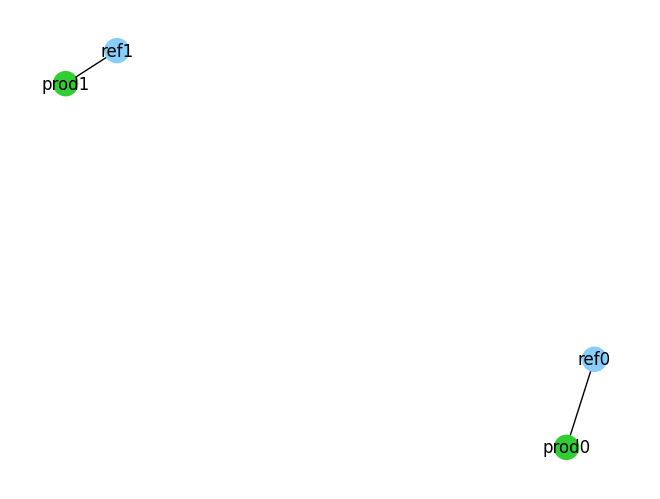

(id: 0) SURVIVED as (id: 0) (score: 1.0)
(id: 1) SURVIVED as (id: 1) (score: 1.0)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 203 ----> Apply macroclustering <!>

ref0 - center: [np.float64(6.212776522223516), np.float64(7.278229835369896), np.float64(11.207263330402423), np.float64(11.282105211125996), np.float64(6.58460474412461), np.float64(6.792773914075506), np.float64(4.608197354478863), np.float64(1.9344250123257019)]
prod0 - center: [np.float64(5.926041305016031), np.float64(7.056046752040568), np.float64(11.28814327234664), np.float64(11.363976665595393), np.float64(6.619552973568135), np.float64(6.884554408124961), np.float64(4.503037276566082), np.float64(1.934175459762135)]
hellinger distance: 0.0

ref0 - center: [np.float64(6.212776522223516), np.float64(7.278229835369896), np.float64(11.207263330402423), np.float64(11.282105211125996), np.

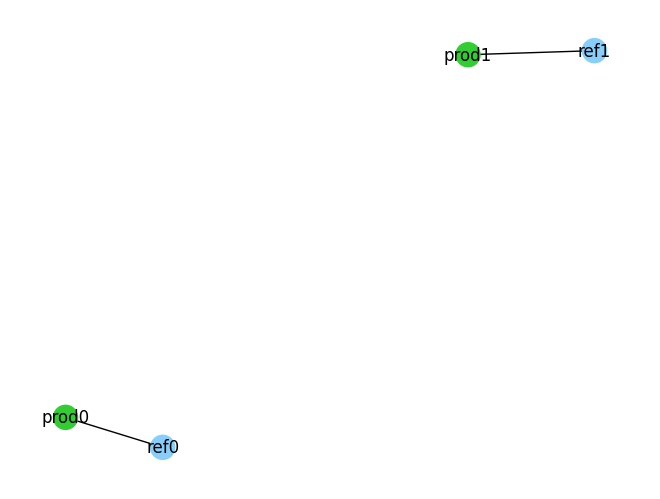

(id: 0) SURVIVED as (id: 0) (score: 1.0)
(id: 1) SURVIVED as (id: 1) (score: 0.529379400382084)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 386 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.926041305016031), np.float64(7.056046752040568), np.float64(11.28814327234664), np.float64(11.363976665595393), np.float64(6.619552973568135), np.float64(6.884554408124961), np.float64(4.503037276566082), np.float64(1.934175459762135)]
prod0 - center: [np.float64(4.192099570103122), np.float64(4.847495382770788), np.float64(8.577326277706847), np.float64(11.039795262229907), np.float64(8.10561491108354), np.float64(7.235151568123521), np.float64(3.034093930845282), np.float64(3.3242234653315004)]
hellinger distance: 0.9992744019557867

ref0 - center: [np.float64(5.926041305016031), np.float64(7.056046752040568), np.float64(11.28814327234664), np.float

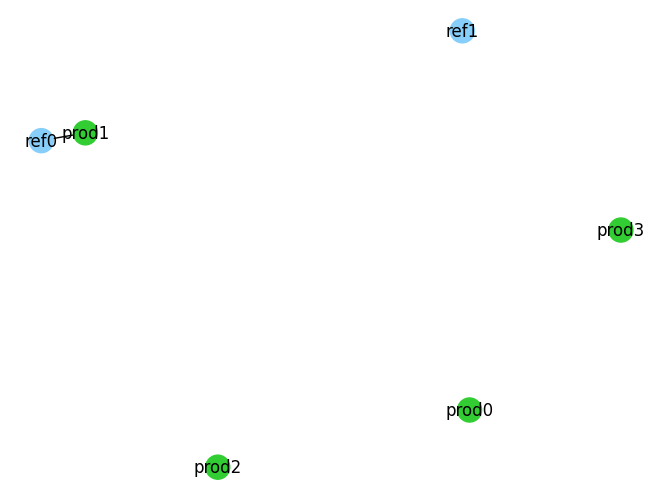

(id: 0)
(!) (id: 1) DISAPPEARED (score: 0.8286703380919687)
(!) (id: 2) APPEARED --- (score: 0.8835798604699937)
(id: 0) SURVIVED as (id: 0) (score: 1.0)
(!) (id: 3) APPEARED --- (score: 0.8286703380919687)
(!) (id: 4) APPEARED --- (score: 0.9612899538014505)

Final macroclusters:
(id: 0)
(id: 2)
(id: 3)
(id: 4)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 684 ----> Apply macroclustering <!>

ref0 - center: [np.float64(6.238213734539726), np.float64(7.279234917667445), np.float64(11.230527893937564), np.float64(11.225766962017259), np.float64(6.5749986495690935), np.float64(6.794267192952291), np.float64(4.610199827488016), np.float64(1.8913098217932658)]
prod0 - center: [np.float64(4.026739603585308), np.float64(4.592676905725772), np.float64(8.979336778295592), np.float64(10.915518550509555), np.float64(8.079370520911711), np.float64(7.255932720699574), np.float64(3.2626748361448588), np.f

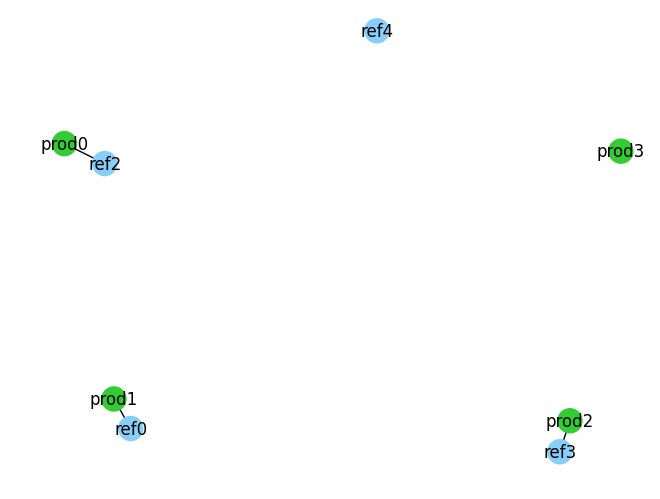

(id: 0)
(!) (id: 4) DISAPPEARED (score: 0.5041228261659556)
(id: 2) SURVIVED as (id: 2) (score: 0.7883261482271164)
(id: 0) SURVIVED as (id: 0) (score: 1.0)
(id: 3) SURVIVED as (id: 3) (score: 1.0)
(!) (id: 4) APPEARED --- (score: 0.5041228261659556)

Final macroclusters:
(id: 0)
(id: 2)
(id: 3)
(id: 4)

-----------------------------------------------------------------------------------

Batch Finished ----> Apply macroclustering

ref0 - center: [np.float64(6.277691216416881), np.float64(7.300079110203803), np.float64(11.190011316707867), np.float64(11.220800925187564), np.float64(6.562470135414462), np.float64(6.801898148368213), np.float64(4.6199625364549615), np.float64(1.9014484715416815)]
prod0 - center: [np.float64(4.137648234702143), np.float64(4.762494906598794), np.float64(9.955841235615926), np.float64(11.010720063707726), np.float64(7.850590158299679), np.float64(7.193002044317321), np.float64(3.66217609275078), np.float64(2.7823575905349953)]
hellinger distance: 0.996429268

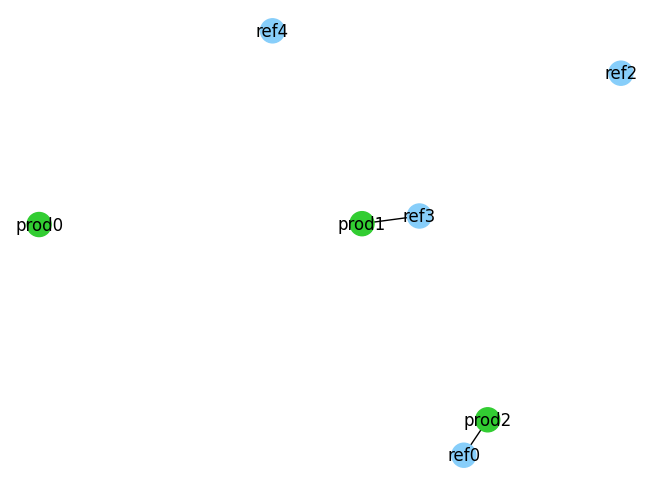

(id: 0)
(!) (id: 2) DISAPPEARED (score: 0.637464733133981)
(id: 0)
(!) (id: 4) DISAPPEARED (score: 0.8877961667448601)
(!) (id: 2) APPEARED --- (score: 0.637464733133981)
(id: 3) SURVIVED as (id: 3) (score: 1.0)
(id: 0) SURVIVED as (id: 0) (score: 1.0)

Final macroclusters:
(id: 0)
(id: 3)
(id: 2)

-----------------------------------------------------------------------------------



In [268]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(print_graph=True, print_statistics=True, macroclustering_at_end=True)

Creating the directory...
Drawing ...


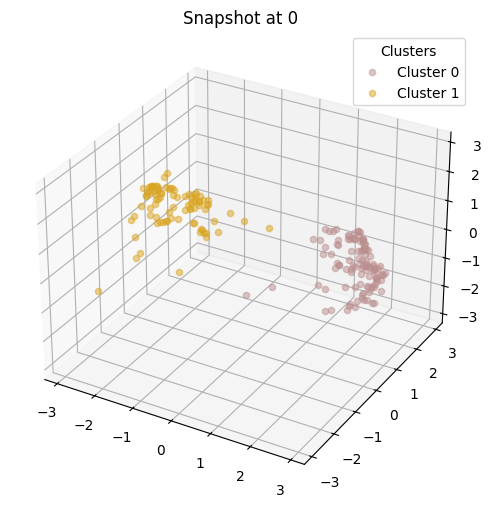

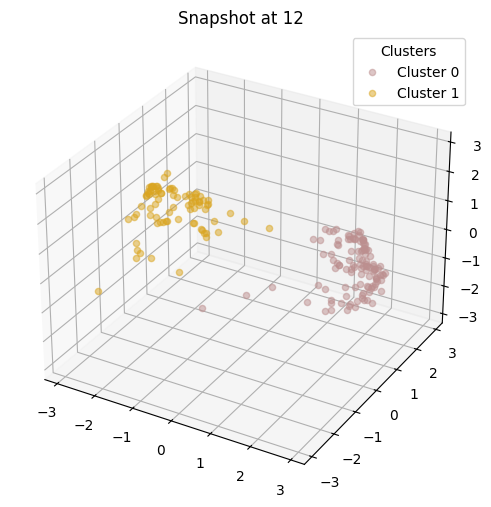

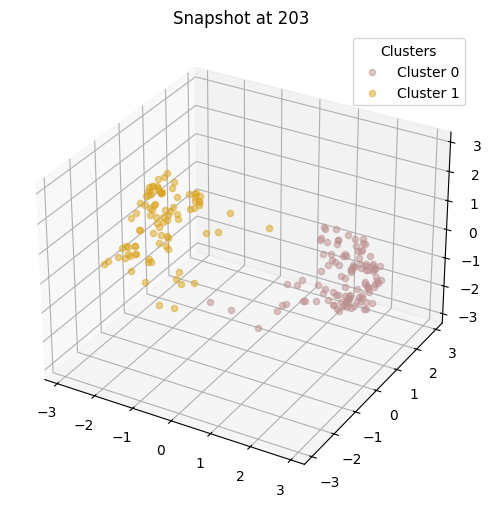

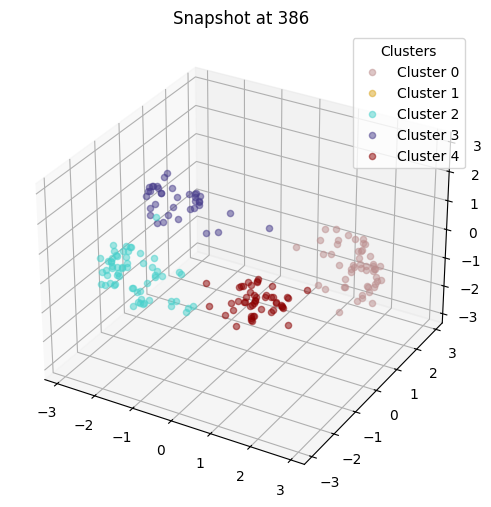

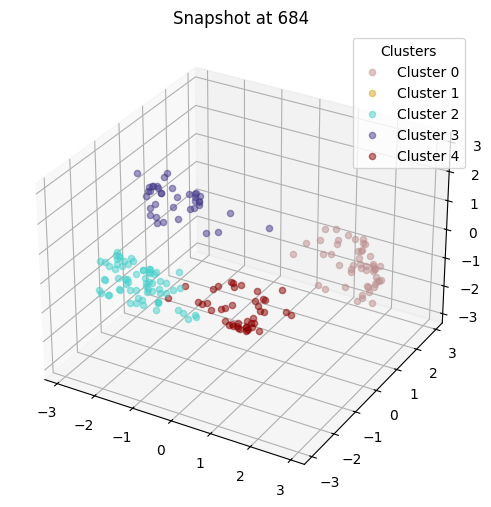

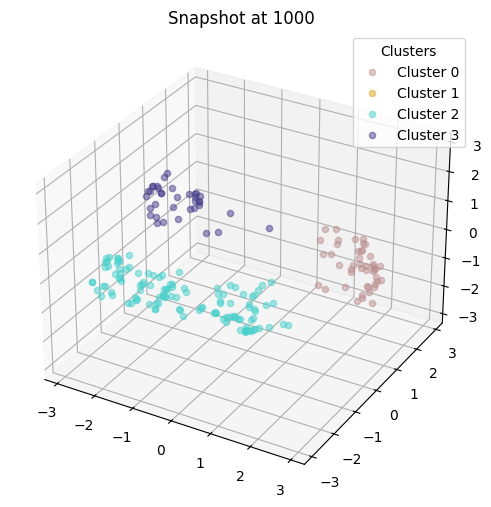

Directory './plots/19479' and its contents removed successfully.


In [269]:
clustream.visualization(dimensions=3, show_image=True, save_gif=True, clean=True)